In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [75]:
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN 
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
import sklearn

In [80]:
data=pd.read_csv("D:/DATA SCIENCE/ASSIGNMENT/QUESTION/CLUSTERING/crime_data.csv")
data1=pd.read_csv("D:/DATA SCIENCE/ASSIGNMENT/QUESTION/CLUSTERING/crime_data.csv")

In [88]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [90]:
data=data.drop(columns=['Unnamed: 0'])
#data1=data.rename(columns={'Unnamed:0':'urban'})


In [91]:
data=data.iloc[:,0:4]

In [92]:
data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [93]:
data.shape

(50, 4)

In [54]:
scaler=MinMaxScaler()
data_scaler=scaler.fit_transform(data)

In [55]:
data_scaler

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [56]:
n=range(1,12)
l=[]
for i in n:
    model=KMeans(n_clusters=i)
    model.fit(data_scaler)
    l.append(model.inertia_)

C:\Users\Anith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Anith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Anith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

([<matplotlib.axis.YTick at 0x13028523450>,
 [Text(0, 13.184122550256445, '13.18'),
  Text(0, 6.596893867946196, '6.60'),
  Text(0, 5.010878493006417, '5.01'),
  Text(0, 3.683456153585913, '3.68'),
  Text(0, 3.1831577316766535, '3.18'),
  Text(0, 2.8768771950709175, '2.88'),
  Text(0, 2.6307585763360715, '2.63'),
  Text(0, 2.273989859991304, '2.27'),
  Text(0, 2.1798956687546642, '2.18'),
  Text(0, 1.896130582147717, '1.90'),
  Text(0, 1.6616851027205208, '1.66')])

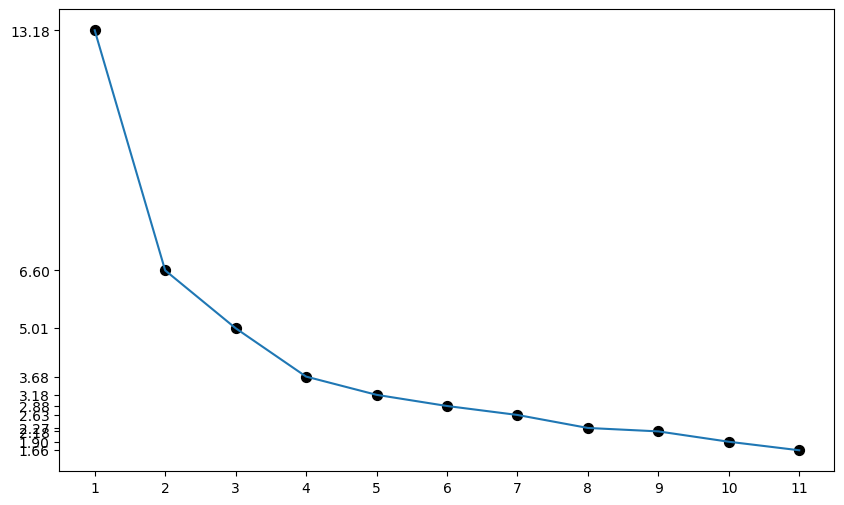

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(n,l,s=50,color='black')
plt.plot(n,l,linestyle="-")
plt.xticks(n)

plt.yticks(l)

In [70]:
model=KMeans(n_clusters=3)
model.fit_predict(data_scaler)

C:\Users\Anith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [71]:
model.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.69467343, 0.73395818, 0.61552186, 0.56629947],
       [0.31425703, 0.33866058, 0.68361582, 0.31122595]])

In [76]:
cluster_new=model.fit_predict(data_scaler)
cluster_new

C:\Users\Anith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [78]:
data['clusterID']=cluster_new

In [79]:
data

,Murder,Assault,UrbanPop,Rape,clusterID
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [82]:
data1['clusterID']=cluster_new

In [83]:
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterID
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [85]:
data1.groupby(['clusterID'])['Unnamed: 0'].apply(lambda x:tuple(x))

clusterID
0    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
1    (Alabama, Alaska, Arizona, California, Colorad...
2    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
Name: Unnamed: 0, dtype: object

In [58]:
from sklearn.metrics import silhouette_score

In [68]:
n=range(2,11)
l=[]

for i in n:
    model=AgglomerativeClustering(n_clusters=i,affinity="l2",linkage='average')
    #model.fit(data_scaler)
    l.append(silhouette_score(data_scaler,model.fit_predict(data_scaler)))

C:\Users\Anith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Anith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Anith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Anith\AppData\Local\Packages\PythonSoftwareFoundation.Pyth

([<matplotlib.axis.YTick at 0x1302c80b990>,
 [Text(0, 0.42364457559625074, '0.4236'),
  Text(0, 0.35149572430421583, '0.3515'),
  Text(0, 0.36992391140277175, '0.3699'),
  Text(0, 0.3257478134255528, '0.3257'),
  Text(0, 0.2815096427769605, '0.2815'),
  Text(0, 0.24382999528072172, '0.2438'),
  Text(0, 0.2506774565216013, '0.2507'),
  Text(0, 0.2169454704716504, '0.2169'),
  Text(0, 0.21877737263827413, '0.2188')])

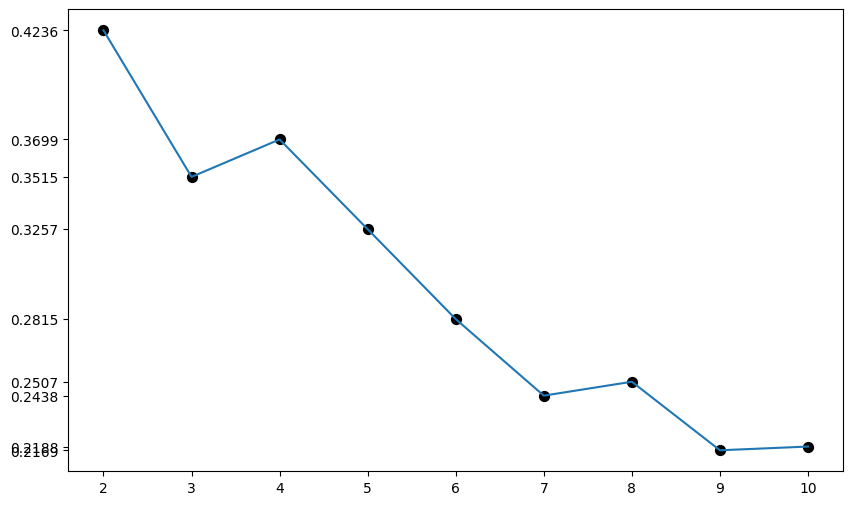

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(n,l,s=50,color='black')
plt.plot(n,l,linestyle="-")
plt.xticks(n)

plt.yticks(l)

In [96]:
st_scalar=StandardScaler()
stand_data=st_scalar.fit_transform(data)

In [101]:
model=AgglomerativeClustering(n_clusters=3,affinity="l2",linkage='complete')
wy=model.fit_predict(stand_data)
wy

C:\Users\Anith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

(array([31.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0., 11.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

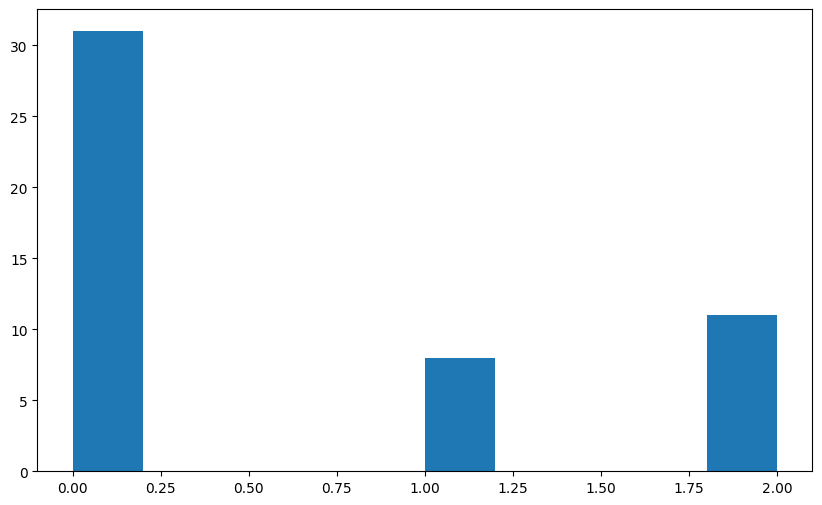

In [100]:
plt.figure(figsize=(10,6))
plt.hist(wy)

In [102]:
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import pdist

In [103]:
x=pdist(stand_data,metric="euclidean")
l=linkage(x,'ward')

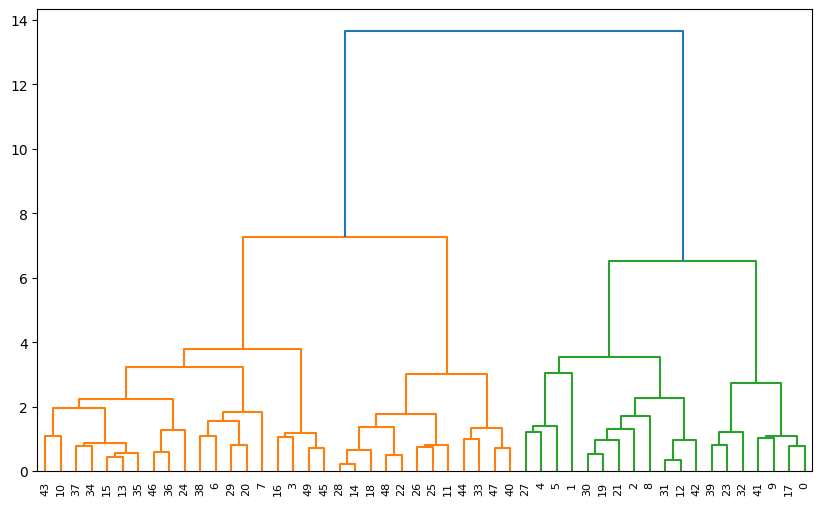

In [107]:
plt.figure(figsize=(10,6))
dendrogram(l,orientation="top",distance_sort="descending",show_leaf_counts=True)
plt.show()

In [108]:
from sklearn.datasets import make_moons

In [109]:
x,y=make_moons(100)

C:\Users\Anith\AppData\Local\Temp\ipykernel_1828\4034844672.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


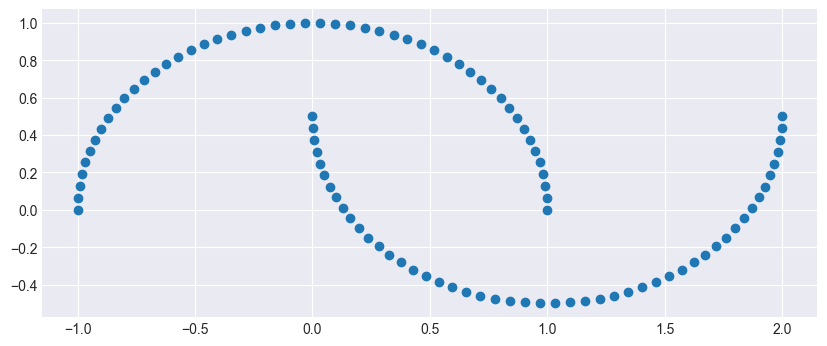

In [110]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(x[:,0],x[:,1])

In [111]:
model=DBSCAN(min_samples=2,eps=0.1)

model.fit_predict(x)

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

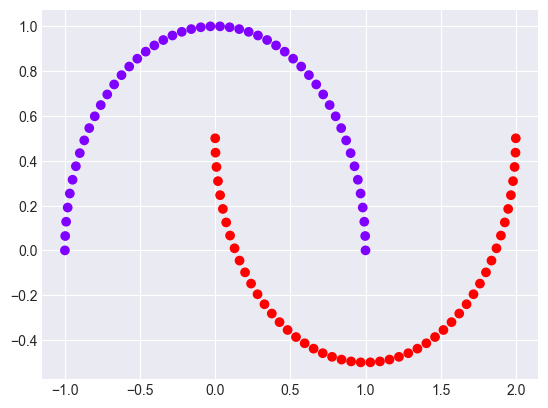

In [112]:
plt.scatter(x[:,0],x[:,1],c=model.fit_predict(x),cmap=plt.cm.rainbow_r)